<a href="https://colab.research.google.com/github/shreyas1209/Deep_Learning/blob/main/Cat_dog_classifier_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets
from torchvision import transforms

In [2]:
data_path = ("C:\\")
cifar_10 = datasets.CIFAR10(data_path, train=True, download=True,transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.4914, 0.4822, 0.4465),(0.2470, 0.2435, 0.2616))]))
classes = cifar_10.classes
print(classes)

Failed download. Trying https -> http instead. Downloading http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz to C:\/cifar-10-python.tar.gz


Extracting C:\/cifar-10-python.tar.gz to C:\
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [3]:
#calculating mean and std dev for normalisation

images = torch.stack([image for image,label in cifar_10],dim= 3)
images.shape

'''mean = images.view(3,-1).mean(dim = 1)
std = images.view(3,-1).std(dim = 1)
print(mean,std)'''

'mean = images.view(3,-1).mean(dim = 1)\nstd = images.view(3,-1).std(dim = 1)\nprint(mean,std)'

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


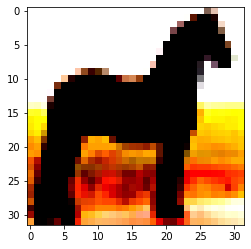

Figure: horse


In [4]:
#randomly showing an image
random_index = np.random.randint((len(cifar_10)))
#displaying the image
image , label = cifar_10[random_index]

plt.imshow(image.permute(1,2,0)) #as imgshow takes HxWxC as its order of parameters
plt.show()
print("Figure:",classes[label])

In [5]:
#this will be used to differentiate between dogs and cats

label_dict = {3:0,5:1}
class_names = {'cat','dog'}
cifar_train = [(img,label_dict[label]) for(img,label) in cifar_10 if label in [3,5]];
cifar_test = [(img,label_dict[label]) for(img,label) in cifar_10 if label in [3,5]];

In [6]:
#creating the model
model = nn.Sequential(
    nn.Linear(3072,1024),
    nn.Tanh(),
    nn.Linear(1024,512),
    nn.Tanh(),
    nn.Linear(512,128),
    nn.Tanh(),
    nn.Linear(128,2),
    nn.LogSoftmax(dim =1)   
)

In [7]:
#training the model
alpha = 0.001 #learning rate
optimiser = torch.optim.SGD(model.parameters(),lr = alpha) # Using stochastic gradient descent 
loss_func = nn.NLLLoss()
epochs = 50

for i in range(epochs):
  for img,label in cifar_train:
    out = model(img.view(-1).unsqueeze(0)) #input as a row vector with an additional dimension
    loss = loss_func(out, torch.tensor([label]))
    
    optimiser.zero_grad()
    loss.backward() #backprop
    optimiser.step() #updating weights
  print("Epoch: %d, Loss: %f" % (i, float(loss)))


Epoch: 0, Loss: 0.599136
Epoch: 1, Loss: 0.592299
Epoch: 2, Loss: 0.589803
Epoch: 3, Loss: 0.586222
Epoch: 4, Loss: 0.574450
Epoch: 5, Loss: 0.551510
Epoch: 6, Loss: 0.524113
Epoch: 7, Loss: 0.502426
Epoch: 8, Loss: 0.496636
Epoch: 9, Loss: 0.511074
Epoch: 10, Loss: 0.515969
Epoch: 11, Loss: 0.505472
Epoch: 12, Loss: 0.342187
Epoch: 13, Loss: 0.284463
Epoch: 14, Loss: 0.162254
Epoch: 15, Loss: 0.421335
Epoch: 16, Loss: 0.269697
Epoch: 17, Loss: 0.599958
Epoch: 18, Loss: 0.051741
Epoch: 19, Loss: 0.002643
Epoch: 20, Loss: 0.001118
Epoch: 21, Loss: 0.001791
Epoch: 22, Loss: 0.036914
Epoch: 23, Loss: 0.010147
Epoch: 24, Loss: 0.002886
Epoch: 25, Loss: 0.004732
Epoch: 26, Loss: 0.005644
Epoch: 27, Loss: 0.010296
Epoch: 28, Loss: 0.001950
Epoch: 29, Loss: 0.007253
Epoch: 30, Loss: 0.002992
Epoch: 31, Loss: 0.000894
Epoch: 32, Loss: 0.001308
Epoch: 33, Loss: 0.008481
Epoch: 34, Loss: 0.000484
Epoch: 35, Loss: 0.002041
Epoch: 36, Loss: 0.000103
Epoch: 37, Loss: 0.000033
Epoch: 38, Loss: 0.000

In [8]:
#validating the trained weights

test_loader = torch.utils.data.DataLoader(cifar_test,batch_size = 64,shuffle = False)
correct = total = 0

with torch.no_grad():
  for img , label in test_loader:
    batch_size = img.shape[0]
    output = model(img.view(batch_size,-1))
    maxi, predicted =  torch.max(output,dim=1)
    total +=label.shape[0]
    correct += int((predicted == label).sum())
print("Score: ", correct / total)





Score:  0.9789
